###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2018 parts of this notebook are from ([this Jupyter notebook](https://nbviewer.jupyter.org/github/krischer/seismo_live/blob/master/notebooks/Computational%20Seismology/The Finite-Difference Method/fd_first_derivative.ipynb)) by Kristina Garina and Heiner Igel ([@heinerigel](https://github.com/heinerigel)) which is a supplemenatry material to the book [Computational Seismology: A Practical Introduction](http://www.computational-seismology.org/),  additional modifications by D. Koehn, notebook style sheet by L.A. Barba, N.C. Clementi

###### Translated by Huizhe Di @ SCSIO

# 有限差分近似

在上一讲中，我们讨论了离散连续媒体的不同方法。
现在，我们只需要理解如何用有限差分逼近(偏)导数。

## 一阶导数的逼近

用有限差分逼近一阶导数是很直接的。 假设我们有一个随时间变化的函数 $f(t)$, 我们要计算它的一阶导数 $\frac{\partial f(t)}{\partial t}$:

<img src="images/gauss_disc_final.png" width="95%">

首先, 我们离散 $f(t)$ 在离散的时间

\begin{equation}
t = i * dt, \nonumber
\end{equation}

这里 $dt$ 表示恒定时间采样间隔. 根据定义, $f(t)$ 对 $t$ 的一阶导数是:

\begin{equation}
\frac{\partial f(t)}{\partial t} = \lim_{dt \rightarrow 0} \frac{f(t+dt)-f(t)}{dt}, \nonumber
\end{equation}

在 **有限差分近似** 中, 我们忽略掉 $dt \rightarrow 0$:

\begin{equation}
\frac{\partial f(t)}{\partial t} \approx \frac{f(t+dt)-f(t)}{dt} \nonumber
\end{equation}

因为 $dt$ 仍然是有限的, 这个近似称为有限差分. 此外，根据近似中涉及的点，我们可以区分不同的有限差分算子. 上面的例子是一个 **forward FD operator**


\begin{equation}
\biggl(\frac{\partial f(t)}{\partial t}\biggr)^+ \approx \frac{f(t+dt)-f(t)}{dt}. \nonumber
\end{equation}

或者，我们也可以定义一个 **backward FD operator**

\begin{equation}
\biggl(\frac{\partial f(t)}{\partial t}\biggr)^- \approx \frac{f(t)-f(t-dt)}{dt}. \nonumber
\end{equation}

通过取前向和后向运算符的算术平均

\begin{equation}
\biggl(\frac{\partial f(t)}{\partial t}\biggr) \approx \frac{\left(\frac{\partial f(t)}{\partial t}\right)^- + \left(\frac{\partial f(t)}{\partial t}\right)^+}{2},\nonumber
\end{equation}

我们得到 **central FD operator**

\begin{equation}
\biggl(\frac{\partial f(t)}{\partial t}\biggr) \approx \frac{f(t+dt)-f(t-dt)}{2dt}. \nonumber
\end{equation}

##### 练习

证明二次函数

\begin{equation} 
g(t) = b t^2 \nonumber
\end{equation} 

其中 $b$ 是一个与时间无关的常数参数, $dt \rightarrow 0$, 前向、后向和中心FD算子可得到正确的时间一阶导数:

\begin{equation} 
\frac{\partial g(t)}{\partial t} = 2 b t \nonumber
\end{equation} 

In [7]:
# Import Libraries
import numpy as np
import math
import matplotlib.pyplot as plt
from pylab import rcParams

作为一个例子，让我们试着计算高斯函数的一阶时间导数

\begin{equation} 
f(t)=\dfrac{1}{\sqrt{2 \pi a}}e^{-\dfrac{(t-t_0)^2}{2a}},\nonumber
\end{equation} 

其中 $a$ 表示高斯函数的半宽度，$t_0$ 表示最大值的时移.

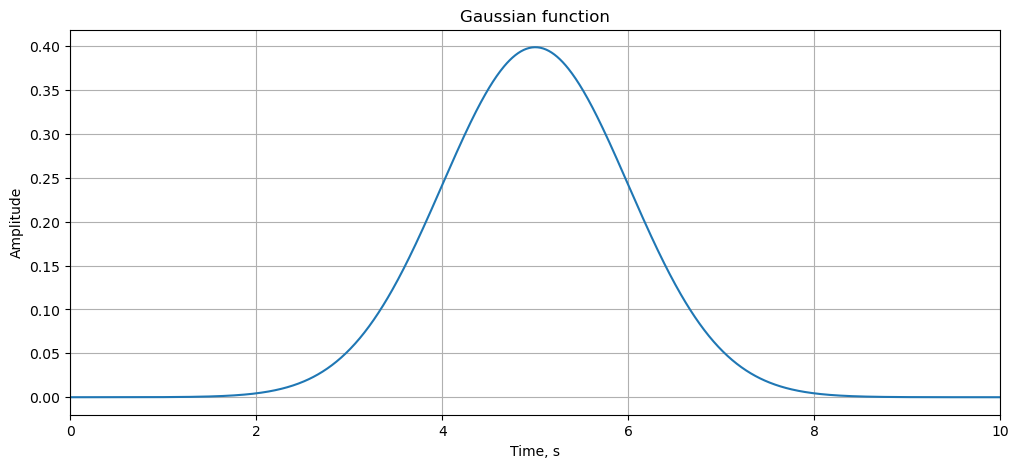

In [8]:
# Define figure size
rcParams['figure.figsize'] = 12, 5

# Initial parameters
tmax=10.0                     # maximum time
nt=1000                       # number of time sample
a=1                           # half-width      
dt=tmax/nt                    # defining dt
t0 = tmax/2                   # defining time shift t0

time=np.linspace(0,tmax,nt)   # defining time

# Define gaussian function          
f=(1./np.sqrt(2*np.pi*a))*np.exp(-(((time-t0)**2)/(2*a)))
    
# Plotting of gaussian
plt.plot(time, f)
plt.title('Gaussian function')
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.xlim((0, tmax))
plt.grid()
plt.show()

接下来，我们用有限差分和正向算子计算数值导数:

\begin{equation}
\biggl(\frac{\partial f(t)}{\partial t}\biggr)^+ \approx \frac{f(t+dt)-f(t)}{dt}. \nonumber
\end{equation}

反向算子:

\begin{equation}
\biggl(\frac{\partial f(t)}{\partial t}\biggr)^- \approx \frac{f(t)-f(t-dt)}{dt}, \nonumber
\end{equation}

和中心算子:

\begin{equation}
\biggl(\frac{\partial f(t)}{\partial t}\biggr) \approx \frac{f(t+dt)-f(t-dt)}{2dt}. \nonumber
\end{equation}

为了检验这些方法的准确性，我们将它们与分析导数进行比较:

\begin{equation} 
\frac{\partial f(t)}{\partial t}=-\dfrac{t-t_0}{a}\dfrac{1}{\sqrt{2\pi a}}e^{-\dfrac{(t-t_0)^2}{2a}} \nonumber
\end{equation} 

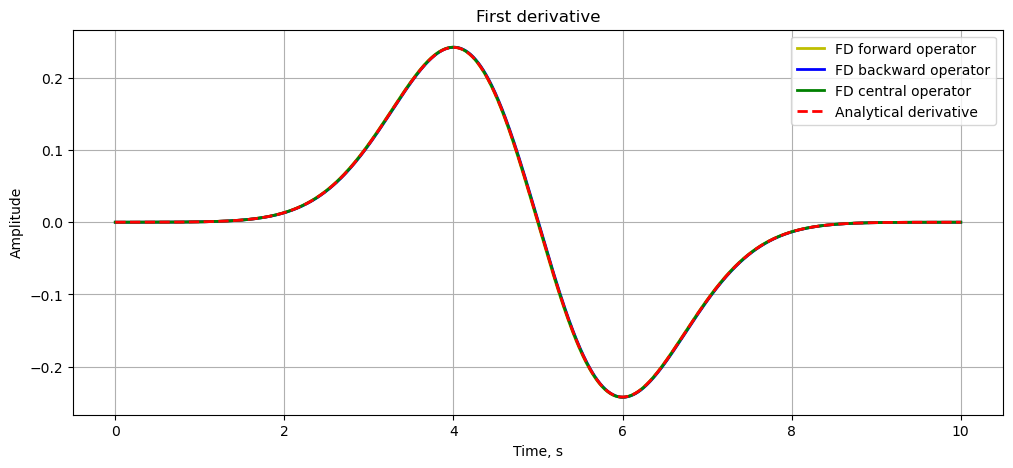

In [9]:
# First derivative of Gaussian function

# Initiation of numerical and analytical derivatives 
nder_for=np.zeros(nt)      # forward FD operator
nder_back=np.zeros(nt)     # backward FD operator
nder_cent=np.zeros(nt)     # central FD operator
ader=np.zeros(nt)          # analytical derivative

# Numerical FD derivative of the Gaussian function
for it in range (1, nt-1):
    
    nder_for[it]=(f[it+1]-f[it])/dt        # forward operator
    nder_back[it]=(f[it]-f[it-1])/dt       # backward operator
    nder_cent[it]=(f[it+1]-f[it-1])/(2*dt) # central operator

# Analytical derivative of the Gaussian function
ader=(-(time-t0)/a)*(1/np.sqrt(2*np.pi*a))*np.exp(-(time-t0)**2/(2*a))     

# Plot of the first derivative and analytical derivative
plt.plot(time, nder_for,label="FD forward operator", lw=2, color="y")
plt.plot(time, nder_back,label="FD backward operator", lw=2, color="b")
plt.plot(time, nder_cent,label="FD central operator", lw=2, color="g")
plt.plot(time, ader, label="Analytical derivative", ls="--",lw=2, color="red")
plt.title('First derivative')
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

所有三种FD算子对高斯函数一阶导数的逼近似乎是非常准确的。实际误差有多大?

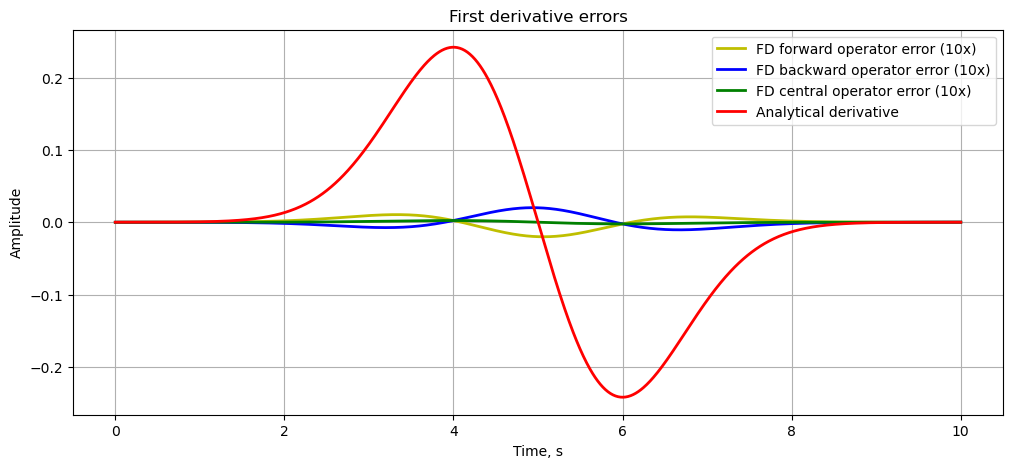

In [10]:
# Erros of the FD approximation

# Plot of the errors of the first derivative FD approximations
plt.plot(time, 10*(nder_for-ader),label="FD forward operator error (10x)", lw=2, color="y")
plt.plot(time, 10*(nder_back-ader),label="FD backward operator error (10x)", lw=2, color="b")
plt.plot(time, 10*(nder_cent-ader),label="FD central operator error (10x)", lw=2, color="g")
plt.plot(time, ader, label="Analytical derivative",lw=2, color="red")
plt.title('First derivative errors')
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

这三个运算符的误差实际上都非常小，所以我们必须将它们放大10倍。较大的误差发生在坡度显著的区域。还要注意，中央算符的误差最小。你想知道为什么吗?我们会在后面的课上看到。

## 二阶导数的有限差分近似

我们推导了一阶导数的有限差分近似。然而，为了近似声波方程，我们还需要知道如何近似二阶导数。 
为了实现这一点，我们计算 **Taylor expansion** of $f(t+dt)$ 直到二阶项:

\begin{equation}
f(t+dt) \approx f(t) + \frac{\partial f(t)}{\partial t} dt + \frac{1}{2}\frac{\partial^2 f(t)}{\partial t^2} dt^2 + \mathcal{O}(dt^3)\nonumber
\end{equation} 

We do the same for $f(t-dt)$:

\begin{equation}
f(t-dt) \approx f(t) - \frac{\partial f(t)}{\partial t} dt + \frac{1}{2}\frac{\partial^2 f(t)}{\partial t^2} dt^2 + \mathcal{O}(dt^3)\nonumber
\end{equation} 

加入 $f(t+dt)$ 和 $f(t-dt)$ 导致: 

\begin{equation}
f(t-dt) + f(t+dt) \approx 2 f(t) + \frac{\partial^2 f(t)}{\partial t^2} dt^2\nonumber
\end{equation} 

最后，我们可以重新排列 $\frac{\partial^2 f(t)}{\partial t^2}$ 得到下面的 **二阶导数的有限差分近似**

\begin{equation}
\frac{\partial^2 f(t)}{\partial t^2} \approx \frac{f(t-dt) + f(t+dt) - 2 f(t)}{dt^2}\nonumber
\end{equation} 

##### 练习

* 计算二阶导数高斯函数的 $\frac{\partial^2 f(t)}{\partial t^2}$ 
\begin{equation} 
f(t)=\dfrac{1}{\sqrt{2 \pi a}}e^{-\dfrac{(t-t_0)^2}{2a}},\nonumber
\end{equation}
analytically
* 计算和比较高斯函数的数值和解析二阶导数以及两个解之间的误差




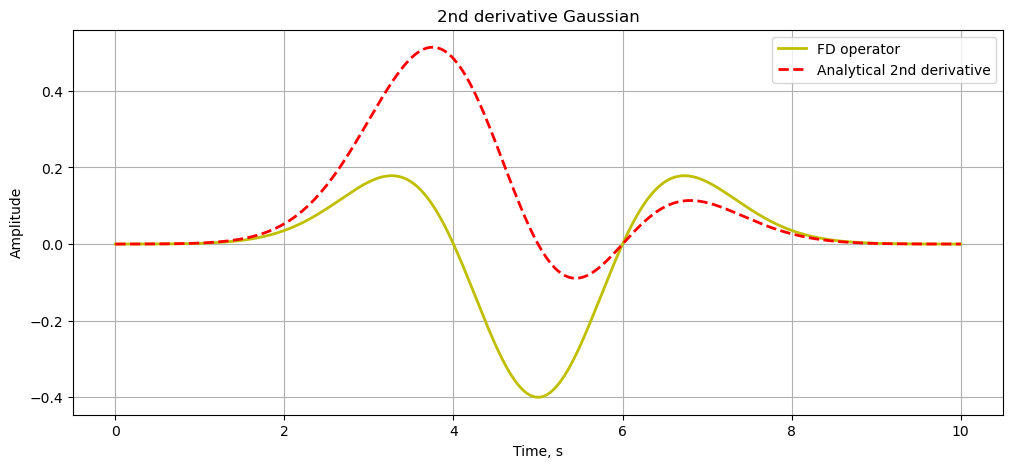

In [18]:
# 2nd derivative of Gaussian function

# Initiation of numerical and analytical derivatives 
nder2=np.zeros(nt)      # 2nd derivative FD operator
ader2=np.zeros(nt)      # analytical 2nd derivative

# Numerical FD derivative of the Gaussian function
for it in range (1, nt-1):
    
    # ADD YOUR 2ND DERIVATIVE OF THE GAUSSIAN HERE!      
      nder2[it]=(f[it-1]+f[it+1]-2*f[it])/(dt*dt) # 2nd derivative FD operator
    
# ADD ANALYTICAL 2ND DERIVATIVE OF THE GAUSSIAN HERE!
ader2=(-(time-t0)/(a*a))*(1/np.sqrt(2*np.pi*a))*np.exp(-(time-t0)**2/(2*a))+(-(time-t0)/a)*(1/np.sqrt(2*np.pi*a))*np.exp(-(time-t0)**2/(2*a))*(-(time-t0)/a)

# Plot of the numerical and analytical second derivative of the Gaussian
plt.plot(time, nder2,label="FD operator", lw=2, color="y")
plt.plot(time, ader2, label="Analytical 2nd derivative", ls="--",lw=2, color="red")
plt.title('2nd derivative Gaussian')
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

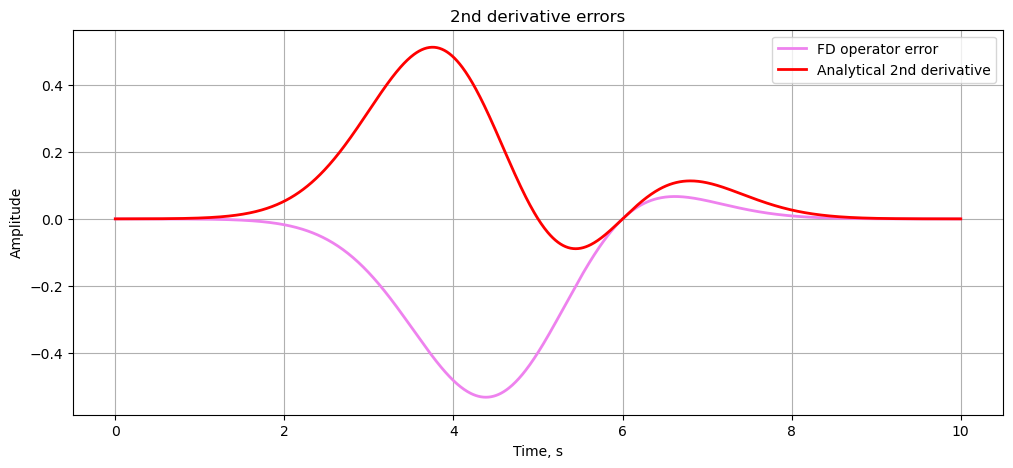

In [19]:
# Error of the 2nd derivative FD approximation

# Plot of the second derivative FD approximation error
plt.plot(time, nder2-ader2,label="FD operator error", lw=2, color="violet")
plt.plot(time, ader2,label="Analytical 2nd derivative", lw=2, color="red")
plt.title('2nd derivative errors')
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

## 我们学习到:

* 用前向、后向和中心有限差分算子逼近与时间相关函数的数值一阶导数
* 与解析解比较，估计数值误差 
* 用泰勒级数展开逼近含时函数的二阶导数